# Arboles de desicion "calidad del vino tinto"

# Grupo_202016908_40_Luis_David_Galeano_Mercado

PASO 1
Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [49]:
#Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [4]:
#Cargamos el dataset y mostramos las 5 filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Exploracion del dataset
data.shape

(1599, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


PASO 2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [11]:
# Cargar el dataset
df = pd.read_csv('winequality-red.csv')

In [12]:
# Verificar valores faltantes
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#interpretacion
indica que no hay valores faltantes en tu dataset "winequality-red.csv".  Esto significa que no es necesario realizar ninguna imputación o eliminación de filas/columnas para manejar datos ausentes puesto que no se presentan valores faltantes

PASO 3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


In [20]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

# 1 Muestra las primeras filas para verificar
print(df.head()) 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
# 2. Preprocesamiento básico (ejemplo: crear 'quality_binary')
df['quality_binary'] = np.where(df['quality'] >= 6, 1, 0)
df = df.drop('quality', axis=1)

In [8]:
# 3. Separar características (X) y variable objetivo (y)
X = df.drop('quality_binary', axis=1)
y = df['quality_binary']

#PASO 4 Dividir el dataset en Train y Test para evaluar correctamente el
modelo.

In [11]:
# 4. Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 5. Entrenar un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# 6. Obtener la importancia de las características
feature_importance = model.feature_importances_

In [14]:
# 7. Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [15]:
# 8. Mostrar la importancia de las características
print(feature_importance_df)

                 Feature  Importance
10               alcohol    0.246768
9              sulphates    0.154949
6   total sulfur dioxide    0.108161
4              chlorides    0.089586
1       volatile acidity    0.078537
8                     pH    0.064894
0          fixed acidity    0.059707
3         residual sugar    0.058219
7                density    0.057018
2            citric acid    0.043417
5    free sulfur dioxide    0.038743


Tabla de importancia de las características:

La tabla muestra la importancia de cada característica en orden descendente.
La columna "Feature" indica el nombre de la característica.
La columna "Importance" indica la importancia relativa de la característica, Cuanto mayor sea el valor, más importante es la característica para el modelo.
Las características más importantes son:
"alcohol" (0.246768)
"sulphates" (0.154949)
"total sulfur dioxide" (0.108161)
"chlorides" (0.089586)
"volatile acidity" (0.078537)
Estas características tienen un impacto significativo en la predicción de la calidad del vino tinto.

In [17]:
# 10. Seleccionar las características más importantes (e.g., las 5 primeras)
selected_features = feature_importance_df['Feature'][:5].tolist()
print("Características seleccionadas:", selected_features)

Características seleccionadas: ['alcohol', 'sulphates', 'total sulfur dioxide', 'chlorides', 'volatile acidity']


In [18]:
# 11. Usar solo las características seleccionadas para entrenar el modelo
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [21]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

In [23]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Definir los hiperparámetros que queremos ajustar
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [32]:
# Crear un objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

In [33]:
# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

PASO 5 Entrenar el modelo configurando los diferentes hiperparámetros

In [34]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [36]:
# Entrenar el modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_split=5,
                       random_state=42)

In [37]:
# Hacer predicciones con el modelo
y_pred = best_model.predict(X_test)

PASO 6 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.


In [38]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.721875


In [41]:
# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       141
           1       0.76      0.74      0.75       179

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



#iNTERPRETACION
Clase 0:
Precisión (precision): 0.68. De todas las predicciones que el modelo hizo para la clase 0, el 68% fueron correctas.
Recall (recall): 0.70. De todas las instancias reales de la clase 0, el modelo identificó correctamente el 70%.
F1-score: 0.69. Es la media armónica de precisión y recall, útil cuando buscas un equilibrio entre ambas métricas.
Support: 141. Es el número de instancias reales de la clase 0 en el conjunto de prueba.

Clase 1:
Precisión (precision): 0.76. De todas las predicciones que el modelo hizo para la clase 1, el 76% fueron correctas.
Recall (recall): 0.74. De todas las instancias reales de la clase 1, el modelo identificó correctamente el 74%.
F1-score: 0.75.
Support: 179.
Métricas Generales:

Accuracy (exactitud): 0.72. Del total de predicciones, el 72% fueron correctas.
El modelo tiene un rendimiento aceptable, con una precisión general del 72%.
El modelo tiende a desempeñarse ligeramente mejor para la clase 1 que para la clase 0.
El F1-score es bastante similar en ambas clases.

PASO 7 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [48]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

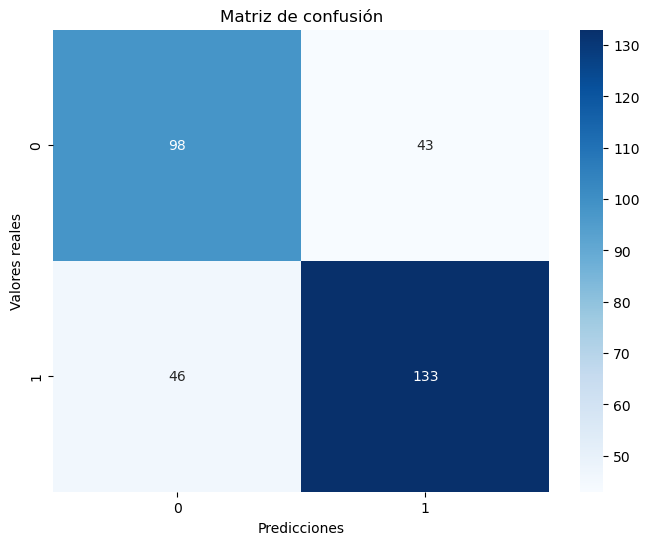

In [50]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

El modelo tiene un rendimiento aceptable, pero no perfecto.
El modelo tiende a desempeñarse ligeramente mejor para la clase 1 que para la clase 0.
El modelo comete más errores al predecir la clase 0 como clase 1 que al predecir la clase 1 como clase 0.

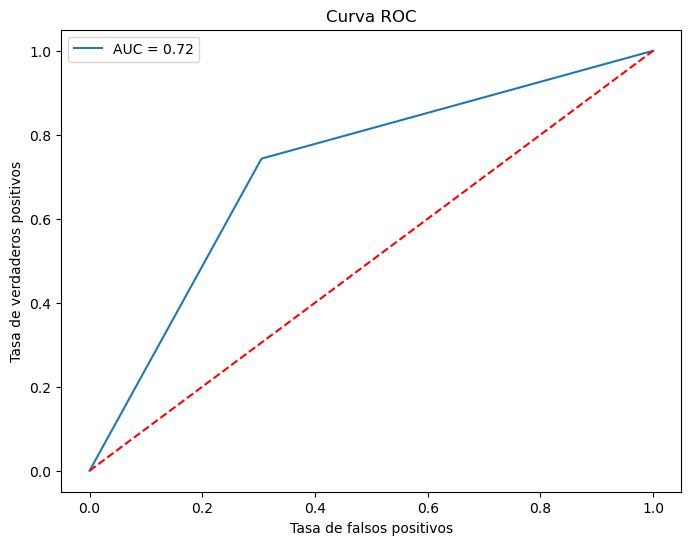

In [51]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

AUC = 0.72: El AUC del modelo es 0.72, lo que indica que el modelo tiene un rendimiento aceptable, pero no perfecto.
Curva ROC: La curva ROC se encuentra por encima de la línea diagonal roja, lo que indica que el modelo es mejor que un clasificador aleatorio.
Rendimiento: El modelo tiene un buen equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos.

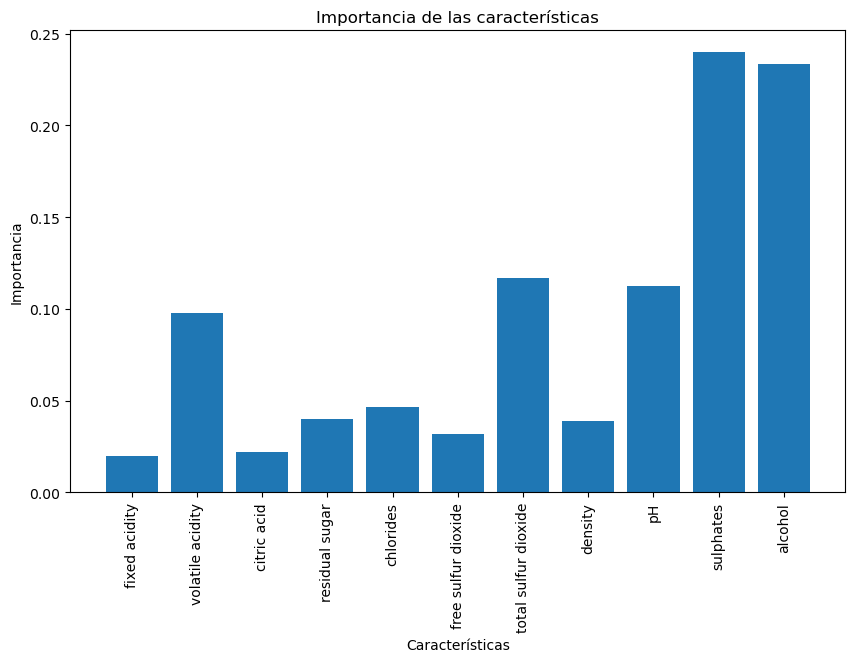

In [52]:
# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(X.columns, best_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()

Características más importantes:

alcohol: La característica más importante para el modelo.
sulphates: La segunda característica más importante.
total sulfur dioxide: La tercera característica más importante.
pH: La cuarta característica más importante.
volatile acidity: La quinta característica más importante.
Características menos importantes:

fixed acidity: La característica menos importante para el modelo.
citric acid: La segunda característica menos importante.
residual sugar: La tercera característica menos importante.
density: La cuarta característica menos importante.
chlorides: La quinta característica menos importante.